In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import xgboost as xgb
pd.set_option('display.max_columns', None)

# Data Exploration

In [2]:
df = pd.read_csv('ifood-data-business-analyst-test/ml_project1_data.csv', parse_dates=True, index_col=0)

In [4]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Describing dataframe coitaining only customers with positive response

In [5]:
df[df['Response'] == 1].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,334.000000,333.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.0,334.0
mean,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,0.008982,3.0,11.0,1.0
std,12.398192,23194.080987,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,46.327903,57.507501,2.109924,2.558784,3.131817,3.081931,2.569891,0.421810,0.389390,0.447411,0.425587,0.237621,0.094489,0.0,0.0,0.0
min,1943.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
25%,1959.000000,39763.000000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,3.000000,20.000000,1.000000,3.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
50%,1971.000000,64090.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,20.000000,39.500000,1.000000,5.000000,4.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
75%,1979.000000,80589.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,57.000000,84.750000,3.000000,7.000000,6.000000,8.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.0,11.0,1.0
max,1996.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,198.000000,245.000000,11.000000,11.000000,11.000000,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.0


### Describing dataframe coitaining only customers with negative response

In [6]:
df[df['Response'] == 0].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1906.000000,1883.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.0,1906.0,1906.0
mean,1968.698846,50839.132767,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567,0.045121,0.055089,0.037251,0.034103,0.005247,0.009444,3.0,11.0,0.0
std,11.910143,25252.804747,0.544975,0.545670,28.519092,305.159188,38.191763,205.299936,52.870253,40.001067,50.576032,1.899981,2.780245,2.799722,3.277521,2.401348,0.207623,0.228214,0.189425,0.181541,0.072262,0.096745,0.0,0.0,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
25%,1959.000000,34421.000000,0.000000,0.000000,27.000000,21.250000,1.000000,14.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
50%,1970.000000,50150.000000,0.000000,1.000000,52.000000,152.000000,7.000000,56.000000,11.000000,7.000000,21.000000,2.000000,3.000000,1.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
75%,1977.000000,66308.000000,1.000000,1.000000,77.000000,443.750000,28.000000,192.750000,43.000000,30.000000,53.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.0
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,0.0


In [7]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
df.shape

(2240, 28)

#### It should be verified if all samples are unique

In [9]:
df_ = df.drop_duplicates()

In [10]:
df_.shape

(2058, 28)

#### It seems implausible that a customer has the exact same year of birth, education, marital status, income and number of kids as another one, let alone same amount spent on each type of product and all other features. So it seems reasonable to discard the duplicates.

In [11]:
df = df_

#### It also seems that it might exist customers with the same information but different responses given. As it is impossible to know if the response was positive or negative, it is best to delete their samples.

In [12]:
cols = df.columns.to_list()
cols.remove('Response')
df = df.drop_duplicates(subset=cols, keep=False)

In [13]:
df.shape

(2020, 28)

#### It is important to verify the class balance of the data set

In [14]:
df['Response'].value_counts()

0    1726
1     294
Name: Response, dtype: int64

In [15]:
df['Response'].value_counts()[1]*100/df.shape[0]

14.554455445544555

#### The data set is unbalanced, with only 14.55% of the responses being 1, and this fact must be properly addressed during the generation of the model using an appropriate evaluation metric, such as AUROC or F1, or F2 scores.

#### An important step is to verify if there is any missing data on the data set

In [16]:
def check_for_missingness(df):
    at_least_one_value_missing = df.apply(lambda x: (len(x)-x.count())>=1, axis=1)
    out = at_least_one_value_missing.value_counts()
    if(out[False]==len(df)):
        print('There are no missing values on the original data.')
    else:
        print('There are ',np.absolute(out[False]-len(df)), ' missing values.')

In [17]:
check_for_missingness(df)

There are  24  missing values.


#### The data set is missing 24 values. Now its important to check what percentage it represents.

In [18]:
24*100/df.shape[0]

1.188118811881188

#### It represents only 1.19% of the samples, which is a fairly low percentage.

#### Now it is important to check in what columns is this data missing from and understand its nature.

In [19]:
df.columns[df.isna().any()].tolist()

['Income']

#### The data is missing from the Income column only. There is strong evidence that this type of research data, when missing, is missing because respondents chose not to answer it. That suggests a MAR or MNAR loss mechanism. 

#### Since there is little information regarding the collection of the data, from here on out it is assumed that the loss mechanism is MAR.

#### Although the percentage of missing data is low, the loss mechanism suggests that simply deleting the samples with missing data might produce biased results. In such case either a classification method that can handle missing values must be chosen or an imputation technique must be used.

#### It was decided to try both approaches and check which one produces better results at the end.

## Imputation Using K-nearest Neighbors

#### KNN Imputation is a generally effective and popular algorithm to imputate data sets.
#### The scikit-learn version uses the euclidean distance metric to find nearest neighbors and the features of the neighbors are then averaged either uniformily or weighted by distance and used to imputate the missing value.

## Classification

#### For the classification problem, the XGBoost library was chosen. The reasoning behind this choice is that XGBoost has been proven a quick and increadibly efficient algorithm winning several Kaggle competitions for teams that used it. Furthermore, XGBoost simplify important steps such as feature selection and missing data imputation as it deals with those steps incredibly well. Also, it is not necessary to scale or normalize the data prior.

#### It is necessary to transform date columns into float

In [20]:
df['Dt_Customer_time_stamp'] = df['Dt_Customer'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp())

C:\ProgramData\Anaconda2\envs\mestrado\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### It is necessary to encode the cathegorical data in order to use both XGBoost and KNN Imputation.

In [21]:
obj_df = df.select_dtypes(include=['object']).copy()

for col in obj_df.columns:
    if col != 'Dt_Customer':
        print(col)
        print(obj_df[col].value_counts())
        print("_____________________________________")

Education
Graduation    1020
PhD            434
Master         333
2n Cycle       184
Basic           49
Name: Education, dtype: int64
_____________________________________
Marital_Status
Married     781
Together    513
Single      442
Divorced    210
Widow        69
Alone         3
Absurd        2
Name: Marital_Status, dtype: int64
_____________________________________


#### It seems that the Marital_Status feature has some unusual responses such as Absurd. A choice has to be made in regarding either deleting the entire sample or just mark them as NAN and let the imputation algorithm deal with them. To make a sound decision, the other features of those samples should be analysed to check if the other information is plausible data.
#### It seems like a good bet to assume that alone means single.

In [22]:
df = df.replace('Alone', 'Single')

In [23]:
df_strange = df.query('Marital_Status.str.contains("YOLO") or Marital_Status.str.contains("Absurd")', engine='python')

In [24]:
df_strange.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1,1.355886e+09
4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0,1.389323e+09


#### As there are only 2 samples with this spurious value, it will not be a great loss to delete them, even though one of them has a positive response, from which we already have only a few examples of.

In [25]:
for index, row in df_strange.iterrows():
    df = df.drop(index)

In [26]:
df.shape

(2018, 29)

#### Finally, encoding the cathegorical features.

In [27]:
obj_df = df.select_dtypes(include=['object']).copy()

for col in obj_df.columns:
    if col != 'Dt_Customer':
        print(col)
        print(obj_df[col].value_counts())
        print("_____________________________________")

Education
Graduation    1019
PhD            434
Master         332
2n Cycle       184
Basic           49
Name: Education, dtype: int64
_____________________________________
Marital_Status
Married     781
Together    513
Single      445
Divorced    210
Widow        69
Name: Marital_Status, dtype: int64
_____________________________________


In [28]:
for col in obj_df.columns:
    if col != 'Dt_Customer':
        df[col] = df[col].astype('category')
        df[col+'_code'] = df[col].cat.codes

In [29]:
df_with_categories = df.copy()
df_with_categories.head()

df_knn = df.copy()
df_xgb = df.copy()

In [30]:
df = df.drop(obj_df.columns.to_list(), axis=1)
df_knn = df_knn.drop(obj_df.columns.to_list(), axis=1)
df_xgb = df_xgb.drop(obj_df.columns.to_list(), axis=1)

In [31]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp,Education_code,Marital_Status_code
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1.346728e+09,2,2
2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1.394248e+09,2,2
4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,1.377054e+09,2,3
6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1.392001e+09,2,3
5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1.390100e+09,4,1


In [32]:
df.shape

(2018, 28)

In [33]:
df.dtypes

Year_Birth                  int64
Income                    float64
Kidhome                     int64
Teenhome                    int64
Recency                     int64
MntWines                    int64
MntFruits                   int64
MntMeatProducts             int64
MntFishProducts             int64
MntSweetProducts            int64
MntGoldProds                int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
AcceptedCmp3                int64
AcceptedCmp4                int64
AcceptedCmp5                int64
AcceptedCmp1                int64
AcceptedCmp2                int64
Complain                    int64
Z_CostContact               int64
Z_Revenue                   int64
Response                    int64
Dt_Customer_time_stamp    float64
Education_code               int8
Marital_Status_code          int8
dtype: object

# Clustering customers with K-Means

### K-Means is a simple yet efficient way to clusterize the customers and try to perceive similarities between customers within the same group and create customer segmentation.

#### It is necessary to scale the data in order to use K-Means.

In [34]:
df_to_input = df.copy()
scaler = preprocessing.StandardScaler()
scaler.fit(df_to_input)
array = scaler.transform(df_to_input)
df_scaled = pd.DataFrame(data=array, index=df_to_input.index, columns=df_to_input.columns)
imp = KNNImputer(n_neighbors=5, weights="uniform")
imp.fit(df_scaled)
array_imputed = imp.transform(df_scaled)
df_imputed_scaled = pd.DataFrame(data=array_imputed, index=df_to_input.index, columns=df_to_input.columns)

In [35]:
df_imputed_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp,Education_code,Marital_Status_code
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,-0.980130,0.225949,-0.826076,-0.925385,0.302526,0.991525,1.545007,1.663133,2.468896,1.457193,0.861487,0.353640,1.391722,2.503947,-0.548200,0.696303,-0.278237,-0.285408,-0.278237,-0.264555,-0.114246,-0.10005,0.0,0.0,2.426391,-1.546210,-0.345223,0.257536
2174,-1.230540,-0.234162,1.032364,0.901842,-0.388199,-0.870263,-0.637500,-0.710658,-0.649780,-0.629728,-0.725478,-0.165753,-1.105670,-0.562793,-1.166398,-0.125176,-0.278237,-0.285408,-0.278237,-0.264555,-0.114246,-0.10005,0.0,0.0,-0.412135,1.181300,-0.345223,0.257536
4141,-0.312371,0.751639,-0.826076,-0.925385,-0.802634,0.367945,0.566642,-0.178753,1.349841,-0.149976,-0.028761,-0.685145,1.391722,-0.222044,1.306397,-0.535915,-0.278237,-0.285408,-0.278237,-0.264555,-0.114246,-0.10005,0.0,0.0,-0.412135,0.194437,-0.345223,1.202460
6182,1.273557,-1.002625,1.032364,-0.925385,-0.802634,-0.870263,-0.562241,-0.649116,-0.503019,-0.581753,-0.744831,-0.165753,-0.748899,-0.903542,-0.548200,0.285564,-0.278237,-0.285408,-0.278237,-0.264555,-0.114246,-0.10005,0.0,0.0,-0.412135,1.052364,-0.345223,1.202460
5324,1.023147,0.231996,1.032364,-0.925385,1.545830,-0.386914,0.416124,-0.218316,0.157406,-0.006050,-0.551299,1.392425,0.321412,0.118705,0.069999,-0.125176,-0.278237,-0.285408,-0.278237,-0.264555,-0.114246,-0.10005,0.0,0.0,-0.412135,0.943263,1.434242,-0.687388


#### It is important to analyse the SSE (Sum of Squared Error) for different K's and plot the curve of the SSE versus K to choose K.

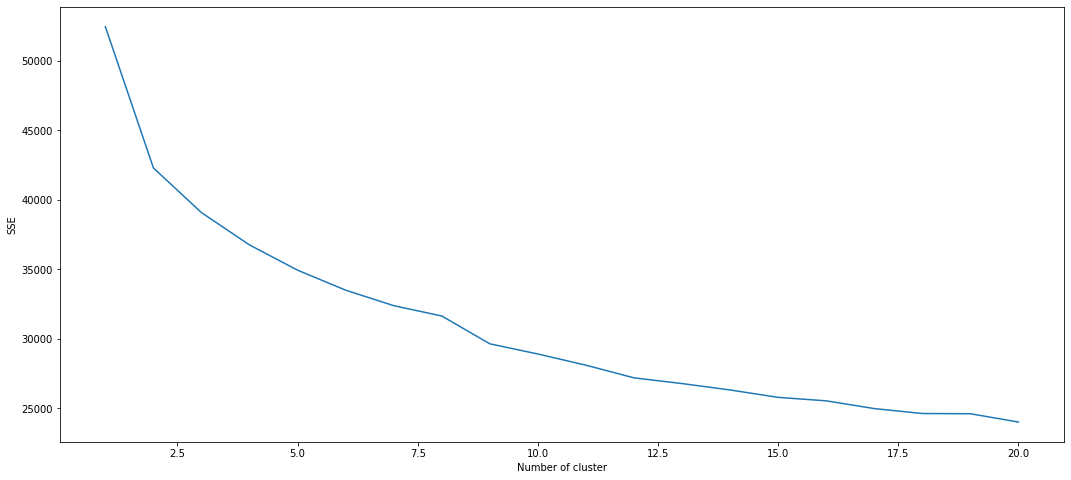

In [36]:
sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_imputed_scaled)

    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(18,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### As it can be seen on the plot of the SSE versus the Number of clusters, there the most visible elbow is at 2 clusters.
#### It seems like a good bet to evaluate the clusters generated both with K = 2, then.
#### The data should be de-scaled to be analyzed, as well as the date and categorical data should be returned to the data-frame.


## K = 2

In [37]:
df_imputed_k_2 = df_imputed_scaled.copy()
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(df_imputed_k_2)
df_imputed_k_2["clusters"] = kmeans.labels_
array_2 = scaler.inverse_transform(df_imputed_scaled)
df_imputed = pd.DataFrame(data=array_2, index=df_to_input.index, columns=df_to_input.columns)
df_imputed = pd.concat([df_imputed, df_imputed_k_2["clusters"], df_with_categories['Dt_Customer'], df_with_categories['Education'], df_with_categories['Marital_Status']], axis=1)

In [38]:
df_imputed.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp,Education_code,Marital_Status_code,clusters,Dt_Customer,Education,Marital_Status
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,1.346728e+09,2.0,2.0,1,2012-09-04,Graduation,Single
2174,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.394248e+09,2.0,2.0,0,2014-03-08,Graduation,Single
4141,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.377054e+09,2.0,3.0,1,2013-08-21,Graduation,Together
6182,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.392001e+09,2.0,3.0,0,2014-02-10,Graduation,Together
5324,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.390100e+09,4.0,1.0,0,2014-01-19,PhD,Married


In [39]:
df1 = df_imputed['clusters'] == 1
df0 = df_imputed['clusters'] == 0

In [40]:
df_k2_class_0 = df_imputed[df0]
df_k2_class_1 = df_imputed[df1]
df_k2_class_0.to_csv('k2_0_training.csv', index = True)
df_k2_class_1.to_csv('k2_1_training.csv', index = True)

In [41]:
df_k2_class_0.shape

(1217, 32)

In [42]:
df_k2_class_0.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp,Education_code,Marital_Status_code,clusters,Dt_Customer,Education,Marital_Status
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2174,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.394248e+09,2.0,2.0,0,2014-03-08,Graduation,Single
6182,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.392001e+09,2.0,3.0,0,2014-02-10,Graduation,Together
5324,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.390100e+09,4.0,1.0,0,2014-01-19,PhD,Married
6177,1985.0,33454.0,1.0,0.0,32.0,76.0,10.0,56.0,3.0,1.0,23.0,2.0,4.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.367982e+09,4.0,1.0,0,2013-05-08,PhD,Married
5899,1950.0,5648.0,1.0,1.0,68.0,28.0,0.0,6.0,1.0,1.0,13.0,1.0,1.0,0.0,0.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.394680e+09,4.0,3.0,0,2014-03-13,PhD,Together


In [43]:
df_k2_class_1.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp,Education_code,Marital_Status_code,clusters,Dt_Customer,Education,Marital_Status
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,1.346728e+09,2.0,2.000000e+00,1,2012-09-04,Graduation,Single
4141,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.377054e+09,2.0,3.000000e+00,1,2013-08-21,Graduation,Together
7446,1967.0,62513.0,0.0,1.0,16.0,520.0,42.0,98.0,0.0,42.0,14.0,2.0,6.0,4.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.378696e+09,3.0,3.000000e+00,1,2013-09-09,Master,Together
965,1971.0,55635.0,0.0,1.0,34.0,235.0,65.0,164.0,50.0,49.0,27.0,4.0,7.0,3.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.352776e+09,2.0,2.220446e-16,1,2012-11-13,Graduation,Divorced
2125,1959.0,63033.0,0.0,0.0,82.0,194.0,61.0,480.0,225.0,112.0,30.0,1.0,3.0,4.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.384484e+09,2.0,2.220446e-16,1,2013-11-15,Graduation,Divorced


In [44]:
df_k2_class_0.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp,Education_code,Marital_Status_code,clusters
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1.217000e+03,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1.217000e+03,1217.000000,1217.000000,1217.0,1217.000000,1217.000000,1217.000000,1217.0,1217.0,1217.000000,1.217000e+03,1217.000000,1.217000e+03,1217.0
mean,1969.976171,39141.537716,0.694330,0.556286,49.060805,104.010682,6.810189,37.981923,9.721446,6.906327e+00,22.497124,2.523418,2.991783,0.886606,3.976171,6.368118e+00,0.066557,0.035333,0.0,0.004930,0.000822,0.010682,3.0,11.0,0.088743,1.375158e+09,2.345933,1.718159e+00,0.0
std,11.580252,15525.084709,0.532103,0.547418,28.869681,144.778293,11.017449,42.447293,15.651545,1.173681e+01,28.876413,1.909029,2.208670,1.041235,1.892747,2.002277e+00,0.249356,0.184695,0.0,0.070071,0.028665,0.102843,0.0,0.0,0.284489,1.728262e+07,1.142540,1.038854e+00,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.552714e-15,0.000000,0.000000,0.000000,0.000000,0.000000,-8.881784e-16,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.343617e+09,0.000000,2.220446e-16,0.0
25%,1962.000000,28510.000000,0.000000,0.000000,24.000000,11.000000,1.000000,9.000000,2.000000,-3.552714e-15,5.000000,1.000000,1.000000,0.000000,3.000000,5.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.360638e+09,2.000000,1.000000e+00,0.0
50%,1971.000000,38593.400000,1.000000,1.000000,49.000000,35.000000,3.000000,20.000000,4.000000,3.000000e+00,12.000000,2.000000,2.000000,1.000000,3.000000,7.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.375844e+09,2.000000,2.000000e+00,0.0
75%,1978.000000,49160.000000,1.000000,1.000000,75.000000,153.000000,8.000000,54.000000,12.000000,8.000000e+00,28.000000,3.000000,4.000000,1.000000,5.000000,8.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.390446e+09,3.000000,3.000000e+00,0.0
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,896.000000,123.000000,253.000000,179.000000,1.570000e+02,262.000000,15.000000,11.000000,6.000000,12.000000,2.000000e+01,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.404011e+09,4.000000,4.000000e+00,0.0


In [45]:
df_k2_class_1.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_time_stamp,Education_code,Marital_Status_code,clusters
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.00000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.0,801.000000,8.010000e+02,801.000000,8.010000e+02,801.0
mean,1966.867665,72332.860924,0.064919,0.430712,49.513109,604.525593,56.194757,364.695381,79.503121,5.816479e+01,75.375780,2.008739,5.781523,5.333333,8.50437,3.689139e+00,0.079900,0.136080,0.181024,0.157303,0.031211,0.008739,3.0,11.0,0.230961,1.371400e+09,2.451935,1.741573e+00,1.0
std,12.344329,24807.217573,0.246537,0.538986,29.118339,316.595660,48.488628,251.683963,64.673142,5.087217e+01,61.473204,1.910804,2.775510,2.852630,2.92836,2.127086e+00,0.271308,0.343088,0.385278,0.364314,0.173996,0.093132,0.0,0.0,0.421711,1.741126e+07,1.093389,1.088293e+00,0.0
min,1899.000000,2447.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,-3.552714e-15,0.000000,0.000000,0.000000,0.000000,0.00000,-8.881784e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.343704e+09,0.000000,2.220446e-16,1.0
25%,1957.000000,63967.000000,0.000000,0.000000,25.000000,366.000000,19.000000,168.000000,28.000000,1.900000e+01,29.000000,1.000000,4.000000,3.000000,6.00000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.357096e+09,2.000000,1.000000e+00,1.0
50%,1967.000000,71691.000000,0.000000,0.000000,51.000000,561.000000,42.000000,298.000000,63.000000,4.200000e+01,54.000000,1.000000,5.000000,5.000000,9.00000,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.369537e+09,2.000000,2.000000e+00,1.0
75%,1976.000000,79734.000000,0.000000,1.000000,74.000000,816.000000,82.000000,507.000000,119.000000,8.900000e+01,111.000000,2.000000,7.000000,7.000000,11.00000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.385867e+09,3.000000,3.000000e+00,1.0
max,1995.000000,666666.000000,1.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,2.630000e+02,362.000000,15.000000,27.000000,28.000000,13.00000,9.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.403924e+09,4.000000,4.000000e+00,1.0


#### By observing the information about the two clusters generated, two customer profiles can be defined by comparing one to the other:
#### 1 - This customer has income ranging mostly from around 28k to 49k, usually has one kid home, spends less in wine, meat, fish, sweet and gold products, purchases a little more deals, but less web, catalog and store purchases, visits the web site more, did not respond very well to any campaign and responded worse to the last campaign as well. Out of 1217 customers with this profile, aproximately 108 responded well to the last campaign.
#### 2 - This customer has higher income, ranging mostly from around 63k to 79k, usually does not have a kid home, spends considerably more in wine, meat, fish, sweet and gold products, visits the website less and accepts a little less deals, but responded a little better to the first, fourth and fifth campaing, as well as the last campaign. Out of 801 customers with this profile,  aproximately 185 responded well to the last campaign.

# Classification using KNN Imputation + XGBoost
##### Obs: In this specific case in which the imputation is being done prior to the classification, it is necessary to scale the data in order for KNN Imputer to work properly.

In [46]:
def print_confusion_matrix(tn, fp, fn, tp):
    print("    ","True", "False")
    print("True ", " ", tp, "  ", fp)
    print("False", " ",fn,"  ", tn)
    print("_______________________________________")
    print("---------------------------------------")

### Running GridSearch to find best Parameters

In [58]:
X = df_knn.drop(['Response'],axis=1)
Y = df_knn['Response']
steps = [('scaler', preprocessing.StandardScaler()), 
         ('Imputer', KNNImputer()), 
         ('XGB', xgb.XGBClassifier(
                                     objective="binary:logistic",
                                     eval_metric = 'auc'
                                  )
         )
        ]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=Y)

parameteres = {       
                'XGB__learning_rate':np.arange(0.01,0.1,0.02),
                'XGB__n_estimators':[500, 1000],
                'XGB__max_depth':range(2,10,2),
                'XGB__subsample':np.arange(0.8,1,0.1),
                'XGB__min_child_weight':range(1,6,2),
                'XGB__colsample_bytree':np.arange(0.3,1,0.2),
                'XGB__scale_pos_weight': [df['Response'].value_counts()[0] / df['Response'].value_counts()[1], np.sqrt(df['Response'].value_counts()[0] / df['Response'].value_counts()[1]), 10, 100]
              }

grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, n_jobs=4)

xgb_model = grid.fit(X_train, y_train)

print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.88
{'XGB__colsample_bytree': 0.7, 'XGB__learning_rate': 0.03, 'XGB__max_depth': 4, 'XGB__min_child_weight': 5, 'XGB__n_estimators': 500, 'XGB__scale_pos_weight': 2.42639073804115, 'XGB__subsample': 0.9}


In [59]:
y_train_pred = xgb_model.predict(X_train)
print("_______________________________________")
print("______________Training_________________")
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = 2*precision*recall/(precision+recall)  
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("F1 score", f_score)
print("Accuracy", accuracy)
print_confusion_matrix(tn, fp, fn, tp)
print("_______________Testing_________________")
y_pred = xgb_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f_score = 2*precision*recall/(precision+recall)  
print("F1 score", f_score)
print("Accuracy", accuracy)
print_confusion_matrix(tn, fp, fn, tp)

_______________________________________
______________Training_________________
F1 score 0.9641255605381166
Accuracy 0.9894249834765367
     True False
True    215    11
False   5    1282
_______________________________________
---------------------------------------
_______________Testing_________________
F1 score 0.5850340136054422
Accuracy 0.8792079207920792
     True False
True    43    31
False   30    401
_______________________________________
---------------------------------------


In [47]:
# As the seed for XGBoost was not set, in order for others to be able to reproduce results, the best params were defined here instead of using grid.best_params_
best_params_knn = {'XGB__colsample_bytree': 0.5, 'XGB__learning_rate': 0.01, 'XGB__max_depth': 3, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 1000, 'XGB__scale_pos_weight': 2.42639073804115, 'XGB__subsample': 0.9}

# Classification using XGBoost only

### Running GridSearch to find best Parameters

In [56]:
X = df_xgb.drop(['Response'],axis=1)
Y = df_xgb['Response']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=Y)


parameteres = {       
                'learning_rate':np.arange(0.01,0.1,0.05),
                'n_estimators':[500, 1000],
                'max_depth':range(2,10,2),
                'subsample':np.arange(0.8,1,0.1),
                'min_child_weight':range(1,6,2),
                'colsample_bytree':np.arange(0.3,1,0.2),
                'scale_pos_weight': [df['Response'].value_counts()[0] / df['Response'].value_counts()[1], np.sqrt(df['Response'].value_counts()[0] / df['Response'].value_counts()[1]), 10, 100]
              }

grid = GridSearchCV(estimator = xgb.XGBClassifier(
                                                    objective="binary:logistic",
                                                    eval_metric = 'auc'
                                                 ),
                    param_grid=parameteres, cv=5, n_jobs=4)

xgb_model = grid.fit(X_train, y_train)

print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.90
{'colsample_bytree': 0.9000000000000001, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 1000, 'scale_pos_weight': 2.42639073804115, 'subsample': 0.9}


In [57]:
y_train_pred = xgb_model.predict(X_train)
print("_______________________________________")
print("______________Training_________________")
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f_score = 2*precision*recall/(precision+recall)  
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("F1 score", f_score)
print("Accuracy", accuracy)
print_confusion_matrix(tn, fp, fn, tp)
print("_______________Testing_________________")
y_pred = xgb_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f_score = 2*precision*recall/(precision+recall)  
print("F1 score", f_score)
print("Accuracy", accuracy)
print_confusion_matrix(tn, fp, fn, tp)

_______________________________________
______________Training_________________
F1 score 0.7220902612826603
Accuracy 0.9226701916721745
     True False
True    152    49
False   68    1244
_______________________________________
---------------------------------------
_______________Testing_________________
F1 score 0.6031746031746031
Accuracy 0.900990099009901
     True False
True    38    15
False   35    417
_______________________________________
---------------------------------------


In [49]:
# As the seed for XGBoost was not set, in order for others to be able to reproduce results, the best params were defined here instead of using grid.best_params_
best_params_xgb = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 1000, 'scale_pos_weight': 10, 'subsample': 0.8}

### Since XGB is stochastic it is good practice to run it mutiple times

In [50]:
def run_knn_xgb_multiple_times(df, best_params, n=30):
    best_f1 = 0
    best_model = None
    mean_f1 = 0
    best_accuracy = 0
    best_tn = 0
    best_fp = 0
    best_fn = 0
    best_tp = 0
    for i in range(0,n):
        X = df.drop(['Response'],axis=1)
        Y = df['Response']
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=Y)

        steps = [('scaler', preprocessing.StandardScaler()), 
                 ('Imputer', KNNImputer()), 
                 ('XGB', xgb.XGBClassifier(objective="binary:logistic",
                                          eval_metric = 'auc',
                                          learning_rate=best_params['XGB__learning_rate'], 
                                          n_estimators=best_params['XGB__n_estimators'], 
                                          min_child_weight=best_params['XGB__min_child_weight'], 
                                          gamma=1,
                                          max_depth=best_params['XGB__max_depth'],
                                          subsample=best_params['XGB__subsample'],
                                          colsample_bytree=best_params['XGB__colsample_bytree'],
                                          scale_pos_weight=best_params['XGB__scale_pos_weight'] 
                                      )
                 )
                ]

        pipeline = Pipeline(steps)

        model_fit = pipeline.fit(X_train, y_train)

        y_pred = model_fit.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f_score = (2*precision*recall/(precision+recall))
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        mean_f1 += f_score
        if f_score > best_f1:
            best_f1 = f_score
            best_model = model_fit
            best_accuracy = accuracy
            best_tn, best_fp, best_fn, best_tp = tn, fp, fn, tp
        
    return mean_f1/n, best_f1, best_accuracy, best_tn, best_fp, best_fn, best_tp, best_model    

In [51]:
mean_knn, best_f1_knn, best_accuracy_knn, best_tn_knn, best_fp_knn, best_fn_knn, best_tp_knn, best_model_knn = run_knn_xgb_multiple_times(df_knn, best_params_knn, n=30)
print("Mean F1 Score", mean_knn)
print("Best F1 score", best_f1_knn)
print("Best Accuracy", best_accuracy_knn)
print_confusion_matrix(best_tn_knn, best_fp_knn, best_fn_knn, best_tp_knn)

Mean F1 Score 0.5646077165211641
Best F1 score 0.6573426573426574
Best Accuracy 0.902970297029703
     True False
True    47    23
False   26    409
_______________________________________
---------------------------------------


#### Although the accuracy is high, the F1 score shows the difficulty of modeling unbalanced dataframes.

#### It's important to verify the importance that XGBoost gave to the features of the dataset.

<AxesSubplot:title={'center':'Feature Importance Model with KNN Imputation'}>

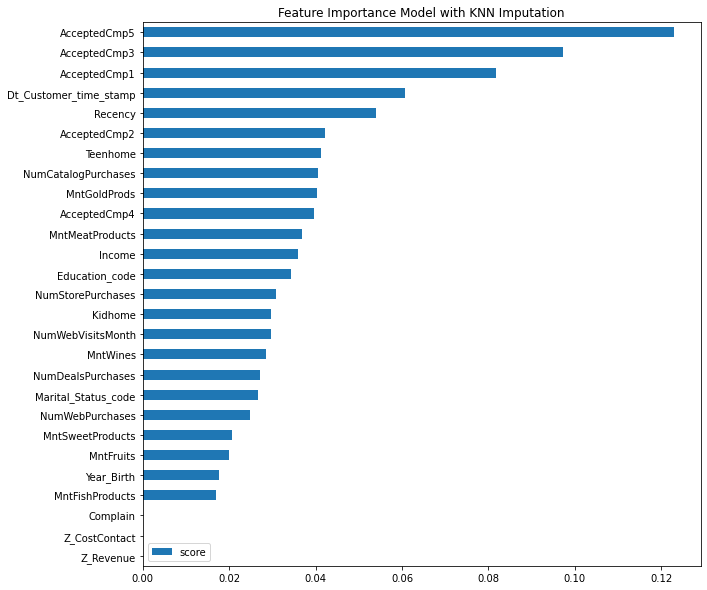

In [52]:
data = pd.DataFrame(data=best_model_knn['XGB'].feature_importances_, index = df_knn.drop(['Response'],axis=1).columns, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh', title='Feature Importance Model with KNN Imputation', figsize=(10,10))

#### Interesting things that can be observed are:
#### - The complain flag is not being used by XGBoost, which suggests that this does not impact the success of the response significantly.
#### - The cost of contact and revenue also do not seem to influence the result.
#### - The most important feature shows that the information about the success of the last campaign is very important to the model.

### Since XGB is stochastic it is good practice to run it mutiple times

In [53]:
def run_xgb_multiple_times(df, best_params, n=30):
    best_f1 = 0
    best_model = None
    mean_f1 = 0
    best_accuracy = 0
    best_tn = 0
    best_fp = 0
    best_fn = 0
    best_tp = 0
    for i in range(0,n):
        X = df.drop(['Response'],axis=1)
        Y = df['Response']

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=Y)

        xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                                          eval_metric = 'auc',
                                          learning_rate=best_params['learning_rate'], 
                                          n_estimators=best_params['n_estimators'], 
                                          min_child_weight=best_params['min_child_weight'], 
                                          gamma=1,
                                          max_depth=best_params['max_depth'],
                                          subsample=best_params['subsample'],
                                          colsample_bytree=best_params['colsample_bytree'],
                                          scale_pos_weight=best_params['scale_pos_weight'] 
                                      )

        model_fit = xgb_model.fit(X_train, y_train)
        y_pred = model_fit.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        f_score = (2*precision*recall/(precision+recall))
        mean_f1 += f_score
        if f_score > best_f1:
            best_f1 = f_score
            best_model = model_fit
            best_accuracy = accuracy
            best_tn, best_fp, best_fn, best_tp = tn, fp, fn, tp
        
    return mean_f1/n, best_f1, best_accuracy, best_tn, best_fp, best_fn, best_tp, best_model   

In [60]:
mean_xgb, best_f1_xgb, best_accuracy_xgb, best_tn_xgb, best_fp_xgb, best_fn_xgb, best_tp_xgb, best_model_xgb = run_xgb_multiple_times(df_xgb, best_params_xgb, n=30)
print("Mean F1 Score", mean_xgb)
print("Best F1 score", best_f1_xgb)
print("Best Accuracy", best_accuracy_knn)
print_confusion_matrix(best_tn_knn, best_fp_knn, best_fn_knn, best_tp_knn)

Mean F1 Score 0.5841212694769656
Best F1 score 0.6533333333333333
Best Accuracy 0.902970297029703
     True False
True    47    23
False   26    409
_______________________________________
---------------------------------------


#### Although the accuracy is high, the F1 score shows the difficulty of modeling unbalanced dataframes.

<AxesSubplot:title={'center':'Feature Importance Model with XGB Imputation'}>

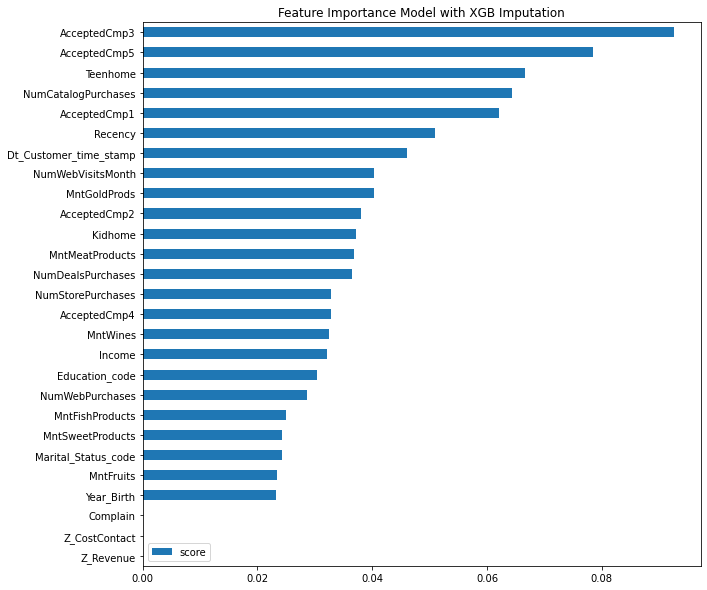

In [55]:
data = pd.DataFrame(data=best_model_xgb.feature_importances_, index=df_xgb.drop(['Response'],axis=1).columns, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh', title='Feature Importance Model with XGB Imputation', figsize=(10,10))

#### The order of the feature importance does not change significantly but the most important feature for this model is the Number of catalog Purchases

## The results suggest that Both classifiers did a good job, with little difference, in classifying customer responses to the market campaign. It is always best to choose the most simple model and therefore, XGBoost without KNN should be used from now on to predict the responses of other customers.